In [21]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#np.warnings.filterwarnings('ignore')

# magic Jupyter function that allows plots to be interactive.
%matplotlib notebook

<IPython.core.display.Javascript object>


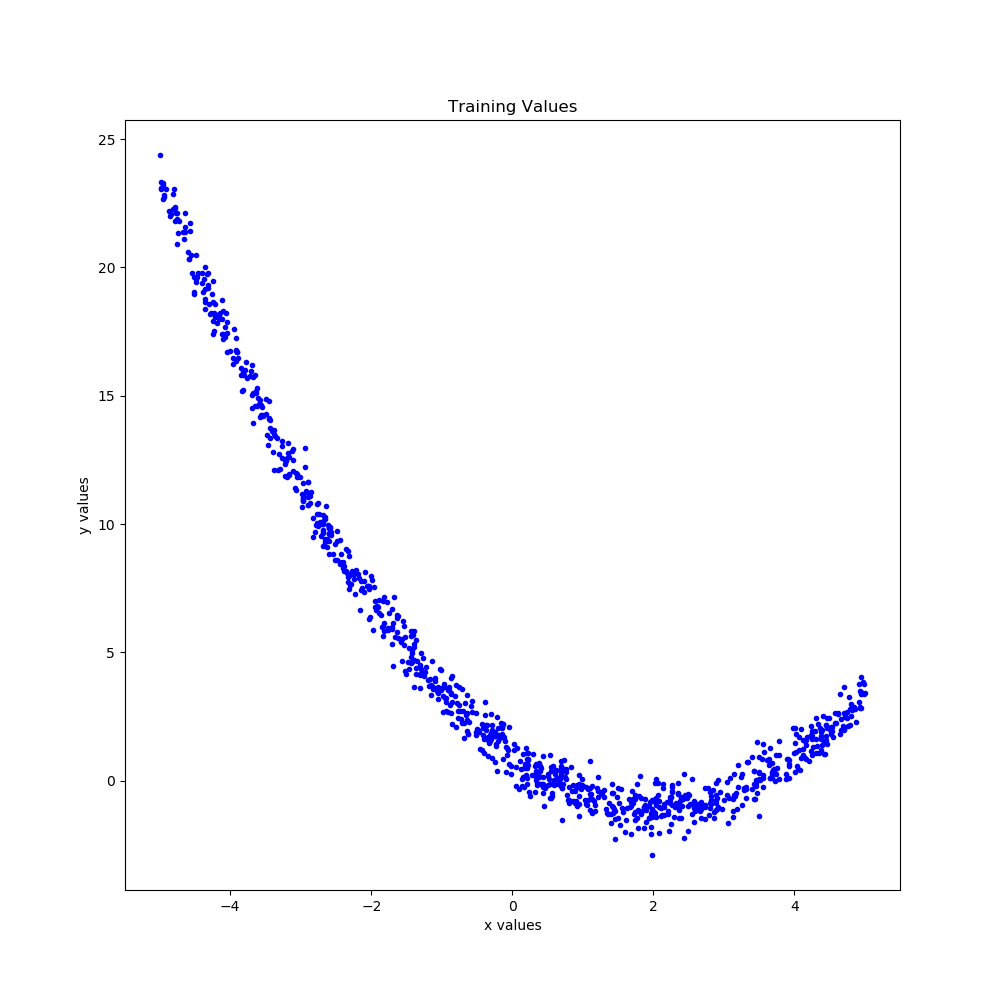

Text(0.5, 1.0, 'Training Values')

In [22]:
df = pd.read_csv('training.csv', header=None)
x_l = df[0].to_numpy() # Line Vector
y_l = df[1].to_numpy()

arr1 = [x_l]
arr2 = [y_l]
x = np.transpose(arr1) # Columm Vector
y = np.transpose(arr2)
 
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Training Values')

In [23]:
M = 1000

np.random.seed(1234)

# Concatenate both column vectors.
X = np.c_[np.ones((M, 1)), x]


# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0] + a_opt[1, 0]*x
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2))

In [26]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.1
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
#error = 1
#grad_hist = np.zeros((2, n_iterations))
#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    #grad_hist[0, iteration] = gradients[0]
    #grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    #a_hist[0, iteration+1] = a[0]
    #a_hist[1, iteration+1] = a[1]
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    #error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

In [27]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: 4.939361968021297
a2_opt: -1.959303243104032
a1_gd: 4.939361968021295
a2_gd: -1.9593032431040303


<IPython.core.display.Javascript object>


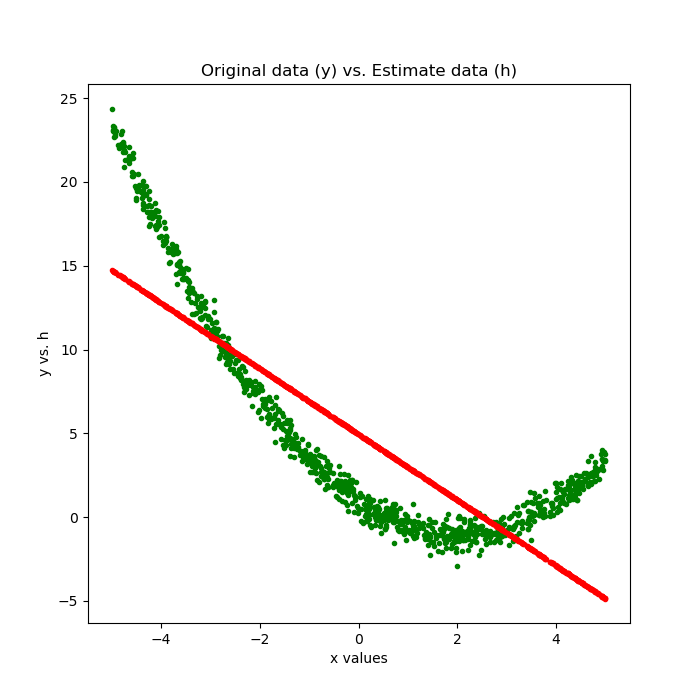

In [28]:
fig = plt.figure(figsize=(7,7))
plt.plot(x, y, 'g.')
plt.plot(x, yhat , 'r.')
#plt.xlim((0, iteration))
#plt.yscale('log')
plt.xlabel('x values')
plt.ylabel('y vs. h')
plt.title('Original data (y) vs. Estimate data (h)')
plt.show()

<IPython.core.display.Javascript object>


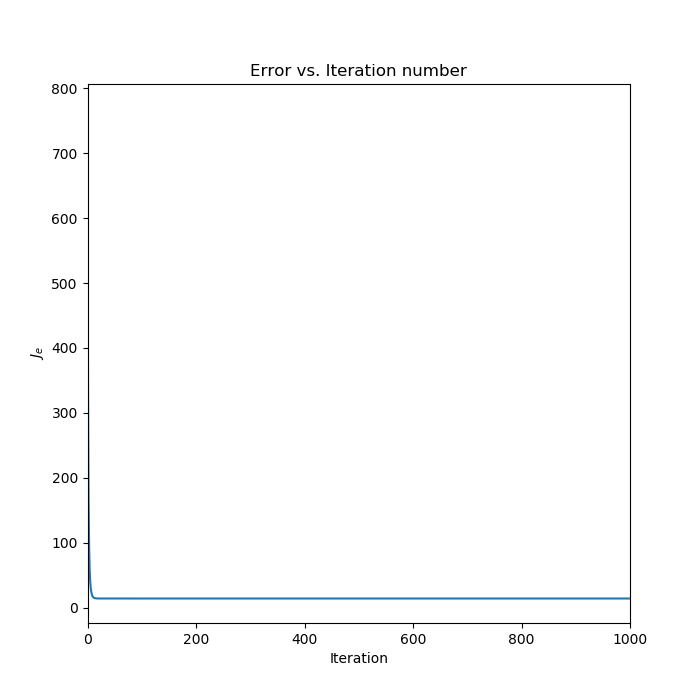

In [29]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()
#plt.savefig("Error_vs_Iteration_bgd.png", dpi=600)